In [16]:
from Bio import SeqIO
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import re

In [2]:
path = "/Users/mayongzhi/Desktop/bioinformatic_project/genotyping_tool/F38_otof-Rprimer.ab1"

In [3]:
record = SeqIO.read(path, "abi")
record

SeqRecord(seq=Seq('CGGGGTGCCTAGGACATAATCTTGGAAAGCACAGGGAGGGTTGGGCCACTACCA...CTA'), id='F38_otof-Rprimer', name='F38_otof-Rprimer', description='', dbxrefs=[])

In [5]:
sequence = record.seq
sequence

Seq('CGGGGTGCCTAGGACATAATCTTGGAAAGCACAGGGAGGGTTGGGCCACTACCA...CTA')

In [6]:
pattern = "ATGCCGTGTCAGGCCGGCTAGGGTGGGGAGAAGACAGG"

In [7]:
channels = []
for d in [1,2,3,4]:
    channels += [f'DATA{d}']
channels

['DATA1', 'DATA2', 'DATA3', 'DATA4']

In [8]:
matches = re.finditer(pattern, str(sequence))

for match in matches:
    start = match.start()
    end = match.end()
    matched_sequence = sequence[start:end]
    print(f"Found '{matched_sequence}' at position {start+1}-{end} in the sequence.")

Found 'ATGCCGTGTCAGGCCGGCTAGGGTGGGGAGAAGACAGG' at position 497-534 in the sequence.


In [13]:
sub_trace = defaultdict(list)
for c in channels:
    sub_trace[c] = record.annotations['abif_raw'][c][start:end]
print("Sub trace data", sub_trace)

Sub trace data defaultdict(<class 'list'>, {'DATA1': (37, 36, 28, 25, 34, 10, 27, 29, 18, 22, 19, 17, 6, 24, 16, 5, 18, 15, 11, 10, 5, 17, -2, 12, 3, 13, 13, 10, 9, 2, 4, 17, 5, 14, 11, -6, 2, 12), 'DATA2': (51, 32, 37, 40, 34, 47, 37, 31, 39, 22, 31, 27, 28, 22, 19, 28, 24, 25, 32, 27, 20, 20, 24, 21, 27, 16, 15, 20, 15, 20, 30, 20, 27, 10, 21, 22, 17, 9), 'DATA3': (16, 18, 14, 24, 31, 9, 4, 21, 17, 42, 15, 17, 11, 16, 11, -1, 12, 1, 27, 0, 24, 16, -16, -1, -15, 21, 20, 7, -7, 6, 7, 5, 28, 29, -1, -18, 14, 35), 'DATA4': (63, 26, 35, 29, 30, 24, 21, 24, 14, 28, 21, 16, 12, 10, 17, 10, 17, 6, 12, 5, 8, 5, 13, 13, 10, 7, 10, 7, 8, 12, 9, 4, 13, -2, -8, -16, -1, -5)})


In [20]:
a = pd.DataFrame(sub_trace, columns = sub_trace.keys())
a.head()

,DATA1,DATA2,DATA3,DATA4
0,37,51,16,63
1,36,32,18,26
2,28,37,14,35
3,25,40,24,29
4,34,34,31,30


In [26]:
a.rename({'DATA1': 'T',
          'DATA2': 'C',
          'DATA3': 'G',
          'DATA4': 'A'},
          axis = 1).head()


,T,C,G,A
0,37,51,16,63
1,36,32,18,26
2,28,37,14,35
3,25,40,24,29
4,34,34,31,30


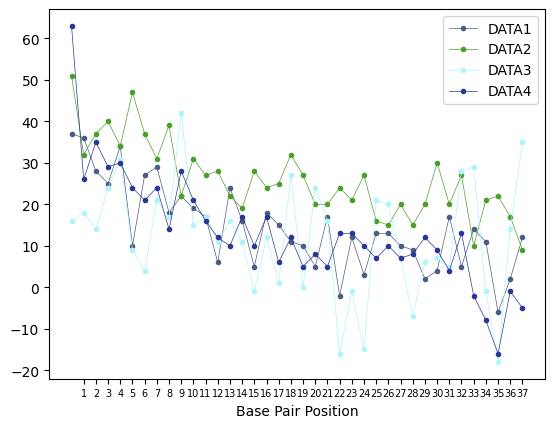

In [11]:
colors = [tuple(np.random.rand(3)) for _ in range(len(channels))]
for i, c in enumerate(channels):
    plt.plot(sub_trace[c], 
             color = colors[i], 
             label = str(c), 
             linestyle = '-', 
             linewidth = 0.5, 
             marker = '.')
x_values = np.arange(1,len(sub_trace['DATA1']),1)
plt.xlabel('Base Pair Position')
plt.legend()
plt.xticks(x_values, fontsize = 7)
#plt.plot(sub_trace['DATA5'], color = 'blue')
#plt.plot(sub_trace['DATA6'], color = 'red')
#plt.plot(sub_trace['DATA7'], color = 'green')
#plt.plot(sub_trace['DATA8'], color = 'yellow')

plt.show()

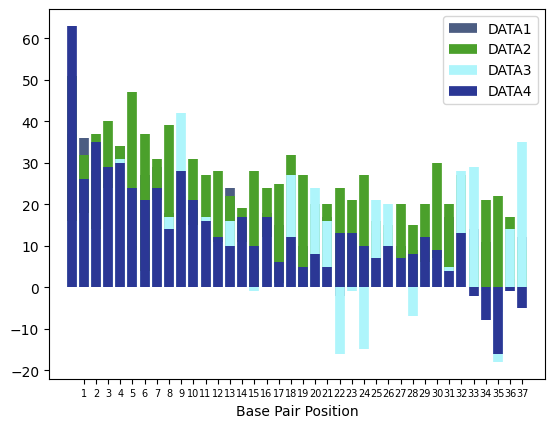

In [12]:
for i, c in enumerate(channels):
    plt.vlines(range(len(sub_trace[c])),
               ymin=0, 
               ymax= sub_trace[c],
               label = str(c),
               color=colors[i], 
               linewidth=7)

# Set x-axis label and y-axis label
plt.xlabel('Base Pair Position')
plt.legend()
plt.xticks(x_values, fontsize = 7)
# Show plot
plt.show()